In [1]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd
import time

In [2]:
URL = 'https://www.technodom.kz/catalog/smartfony-i-gadzhety/smartfony-i-telefony/smartfony?page=2'

In [3]:
page_str = ""
for i in range(1,6):
    page = requests.get(URL+str(i))

In [4]:
# first method: requests
page = requests.get(URL)
page

<Response [200]>

In [5]:
page_str = page.text
page_str

'<!DOCTYPE html><html prefix="og: http://ogp.me/ns#" lang="almaty"><head><meta name="viewport" content="width=device-width"/><meta charSet="utf-8"/><title>Смартфоны - купить в Алматы, по недорогой цене в Казахстане | интернет магазин Технодом - Страница 2</title><link href="/favicon.ico" rel="icon"/><meta content="Смартфоны ❱❱❱ в ⭐️TECHNODOM⭐️ 【НИЗКАЯ ЦЕНА + Скидки + Акции】 ❱ ⚡️ Бесплатная доставка в Алматы  ✅ Рассрочка до 0-0-24 ✅ Кредит ✈️ Доставка в любую точку Казахстана. - Страница 2" name="description"/><meta content="INDEX,FOLLOW" name="robots"/><meta content="Смартфоны - купить в Алматы, по недорогой цене в Казахстане | интернет магазин Технодом - Страница 2 | Страница 2" name="og:title"/><meta content="Смартфоны ❱❱❱ в ⭐️TECHNODOM⭐️ 【НИЗКАЯ ЦЕНА + Скидки + Акции】 ❱ ⚡️ Бесплатная доставка в Алматы  ✅ Рассрочка до 0-0-24 ✅ Кредит ✈️ Доставка в любую точку Казахстана. - Страница 2" name="og:description"/><meta content="ru_KZ" name="og:locale"/><meta content="https://www.technodom.

In [6]:
page_str[:100]

'<!DOCTYPE html><html prefix="og: http://ogp.me/ns#" lang="almaty"><head><meta name="viewport" conten'

In [7]:
page_str[-100:]

'k_kk","ekibastuz","ekibastuz_kk"],"defaultLocale":"almaty","scriptLoader":[]}</script></body></html>'

In [8]:
pointer = page_str.find(f'<ul class="ProductList_block__a_Zdv"')

In [9]:
print(pointer)

276093


In [10]:
page_str[pointer: pointer + 300]

'<ul class="ProductList_block__a_Zdv"><li class="ProductList_item__9Jj7j" data-testid="category-page-list-item"><a class="ProductItem_itemLink__QPKXB" role="link" tabindex="0" href="/p/smartfon-honor-x9b-256gb-emerald-green-275782"><div class="ProductCardV_card__pIoz2 ProductItem_product__HR8Z9" data'

In [11]:
soup = BeautifulSoup(page_str, 'html.parser')
print(soup.find('p', attrs={'class': 'Typography RatingAndReviewsCount_rating__xG62B Typography__M Typography__M_Bold'}))

None


In [12]:
block = soup.find('div', attrs={'data-testid':'product-card'})

In [13]:
block

<div class="ProductCardV_card__pIoz2 ProductItem_product__HR8Z9" data-testid="product-card" role="button" tabindex="0"><div class="ProductCardVisualInfo_block__C75SM"><div class="ProductCardImageOrCarousel_block__zYy6V ProductCardVisualInfo_imageOrCarousel__zSnEp ProductCardImageOrCarousel_carousel__zh4hW"><div class="ProductCardCarousel_carousel__YKH_m"><span style="box-sizing:border-box;display:inline-block;overflow:hidden;width:initial;height:initial;background:none;opacity:1;border:0;margin:0;padding:0;position:relative;max-width:100%"><span style="box-sizing:border-box;display:block;width:initial;height:initial;background:none;opacity:1;border:0;margin:0;padding:0;max-width:100%"><img alt="" aria-hidden="true" src="data:image/svg+xml,%3csvg%20xmlns=%27http://www.w3.org/2000/svg%27%20version=%271.1%27%20width=%27140%27%20height=%27140%27/%3e" style="display:block;max-width:100%;width:initial;height:initial;background:none;opacity:1;border:0;margin:0;padding:0"/></span><img alt="Сма

In [14]:
name = block.find('p', attrs={'data-testid': 'product-price'})

In [15]:
name

<p class="Typography ProductCardPrices_price__5dlTx Typography__Subtitle" data-testid="product-price">179 990 ₸</p>

In [16]:
name.text

'179\xa0990\xa0₸'

In [17]:
rating = block.find('p', attrs={'class': 'RatingAndReviewsCount_review__EiJSu'})
rating

<p class="Typography RatingAndReviewsCount_review__EiJSu Typography__M">Нет отзывов</p>

In [18]:
rating

<p class="Typography RatingAndReviewsCount_review__EiJSu Typography__M">Нет отзывов</p>

In [19]:
price = block.find('span', attrs={'class': 'i_price'})

In [20]:
price

In [23]:
# we can now find the name and price of items. Let's automate this process
phone_names = []
phone_prices = []
# phone_ratings = []
URL = 'https://www.technodom.kz/catalog/smartfony-i-gadzhety/smartfony-i-telefony/smartfony?page='
for i in range(1,6):
    url = URL+str(i)
    print(url)
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    print(soup.find('p', attrs={'class': 'RatingAndReviewsCount_rating__xG62B'}))
    for block in soup.findAll('div', attrs={'data-testid':'product-card'}):
        phone_name_str = block.find('p', attrs={'data-testid':'product-title'}).text
        phone_price_str = block.find('p', attrs={'data-testid':'product-price'}).text
        phone_price_str = int(phone_price_str.replace("\xa0", "").replace("₸",'').replace(' ', ''))
        phone_names.append(phone_name_str)
        phone_prices.append(phone_price_str)


https://www.technodom.kz/catalog/smartfony-i-gadzhety/smartfony-i-telefony/smartfony?page=1
None
https://www.technodom.kz/catalog/smartfony-i-gadzhety/smartfony-i-telefony/smartfony?page=2
None
https://www.technodom.kz/catalog/smartfony-i-gadzhety/smartfony-i-telefony/smartfony?page=3
None
https://www.technodom.kz/catalog/smartfony-i-gadzhety/smartfony-i-telefony/smartfony?page=4
None
https://www.technodom.kz/catalog/smartfony-i-gadzhety/smartfony-i-telefony/smartfony?page=5
None


In [24]:
# we can now find the name and price of items. Let's automate this process
laptop_names = []
laptop_prices = []
# ratings = []
URL = 'https://www.technodom.kz/catalog/noutbuki-i-komp-jutery/noutbuki-i-aksessuary/noutbuki?page='
for i in range(1,10):
    url = URL+str(i)
    print(url)
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    for block in soup.findAll('div', attrs={'data-testid':'product-card'}):
        laptop_name_str = block.find('p', attrs={'data-testid':'product-title'}).text
        laptop_price_str = block.find('p', attrs={'data-testid':'product-price'}).text
        laptop_price_str = int(laptop_price_str.replace("\xa0", "").replace("₸",'').replace(' ', ''))
        rating = block.find('p', attrs={'class': 'RatingAndReviewsCount_review__EiJSu'})
        #oldprice_str = block.find('p', attrs={'Typography RatingAndReviewsCount_rating__xG62B Typography__M Typography__M_Bold'}).text
        laptop_names.append(laptop_name_str)
        laptop_prices.append(laptop_price_str)


https://www.technodom.kz/catalog/noutbuki-i-komp-jutery/noutbuki-i-aksessuary/noutbuki?page=1
https://www.technodom.kz/catalog/noutbuki-i-komp-jutery/noutbuki-i-aksessuary/noutbuki?page=2
https://www.technodom.kz/catalog/noutbuki-i-komp-jutery/noutbuki-i-aksessuary/noutbuki?page=3
https://www.technodom.kz/catalog/noutbuki-i-komp-jutery/noutbuki-i-aksessuary/noutbuki?page=4
https://www.technodom.kz/catalog/noutbuki-i-komp-jutery/noutbuki-i-aksessuary/noutbuki?page=5
https://www.technodom.kz/catalog/noutbuki-i-komp-jutery/noutbuki-i-aksessuary/noutbuki?page=6
https://www.technodom.kz/catalog/noutbuki-i-komp-jutery/noutbuki-i-aksessuary/noutbuki?page=7
https://www.technodom.kz/catalog/noutbuki-i-komp-jutery/noutbuki-i-aksessuary/noutbuki?page=8
https://www.technodom.kz/catalog/noutbuki-i-komp-jutery/noutbuki-i-aksessuary/noutbuki?page=9


In [25]:
# we can now find the name and price of items. Let's automate this process
refrigerator_names = []
refrigerator_prices = []
# ratings = []
URL = 'https://www.technodom.kz/catalog/bytovaja-tehnika/hranenie-produktov-i-napitkov/holodil-niki?page='
for i in range(1,10):
    url = URL+str(i)
    print(url)
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    for block in soup.findAll('div', attrs={'data-testid':'product-card'}):
        refrigerator_name_str = block.find('p', attrs={'data-testid':'product-title'}).text
        refrigerator_price_str = block.find('p', attrs={'data-testid':'product-price'}).text
        refrigerator_price_str = int(refrigerator_price_str.replace("\xa0", "").replace("₸",'').replace(' ', ''))
        rating = block.find('p', attrs={'class': 'RatingAndReviewsCount_review__EiJSu'})
        #oldprice_str = block.find('p', attrs={'Typography RatingAndReviewsCount_rating__xG62B Typography__M Typography__M_Bold'}).text
        refrigerator_names.append(refrigerator_name_str)
        refrigerator_prices.append(refrigerator_price_str)


https://www.technodom.kz/catalog/bytovaja-tehnika/hranenie-produktov-i-napitkov/holodil-niki?page=1
https://www.technodom.kz/catalog/bytovaja-tehnika/hranenie-produktov-i-napitkov/holodil-niki?page=2
https://www.technodom.kz/catalog/bytovaja-tehnika/hranenie-produktov-i-napitkov/holodil-niki?page=3
https://www.technodom.kz/catalog/bytovaja-tehnika/hranenie-produktov-i-napitkov/holodil-niki?page=4
https://www.technodom.kz/catalog/bytovaja-tehnika/hranenie-produktov-i-napitkov/holodil-niki?page=5
https://www.technodom.kz/catalog/bytovaja-tehnika/hranenie-produktov-i-napitkov/holodil-niki?page=6
https://www.technodom.kz/catalog/bytovaja-tehnika/hranenie-produktov-i-napitkov/holodil-niki?page=7
https://www.technodom.kz/catalog/bytovaja-tehnika/hranenie-produktov-i-napitkov/holodil-niki?page=8
https://www.technodom.kz/catalog/bytovaja-tehnika/hranenie-produktov-i-napitkov/holodil-niki?page=9


In [26]:
tv_names = []
tv_prices = []
# ratings = []
URL = 'https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page='
for i in range(1,13):
    url = URL+str(i)
    print(url)
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    for block in soup.findAll('div', attrs={'data-testid':'product-card'}):
        tv_name_str = block.find('p', attrs={'data-testid':'product-title'}).text
        tv_price_str = block.find('p', attrs={'data-testid':'product-price'}).text
        tv_price_str = int(tv_price_str.replace("\xa0", "").replace("₸",'').replace(' ', ''))
        rating = block.find('p', attrs={'class': 'RatingAndReviewsCount_review__EiJSu'})
        #oldprice_str = block.find('p', attrs={'Typography RatingAndReviewsCount_rating__xG62B Typography__M Typography__M_Bold'}).text
        tv_names.append(tv_name_str)
        tv_prices.append(tv_price_str)


https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page=1
https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page=2
https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page=3
https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page=4
https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page=5
https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page=6
https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page=7
https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page=8
https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page=9
https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page=10
https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page=11
https://www.technodom.kz/catalog/tv-audio-foto-video

In [27]:
tv_names = []
tv_prices = []
# ratings = []
URL = 'https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page='
for i in range(1,13):
    url = URL+str(i)
    print(url)
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    for block in soup.findAll('div', attrs={'data-testid':'product-card'}):
        tv_name_str = block.find('p', attrs={'data-testid':'product-title'}).text
        tv_price_str = block.find('p', attrs={'data-testid':'product-price'}).text
        tv_price_str = int(tv_price_str.replace("\xa0", "").replace("₸",'').replace(' ', ''))
        rating = block.find('p', attrs={'class': 'RatingAndReviewsCount_review__EiJSu'})
        #oldprice_str = block.find('p', attrs={'Typography RatingAndReviewsCount_rating__xG62B Typography__M Typography__M_Bold'}).text
        tv_names.append(tv_name_str)
        tv_prices.append(tv_price_str)


https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page=1
https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page=2
https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page=3
https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page=4
https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page=5
https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page=6
https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page=7
https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page=8
https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page=9
https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page=10
https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page=11
https://www.technodom.kz/catalog/tv-audio-foto-video

https://www.technodom.kz/catalog/tv-audio-foto-video/televizory/led-televizory?page=12

In [28]:
tv_names

['Телевизор Hisense 55" 55A6K UHD Smart Black',
 'Телевизор Samsung 55" UE55AU7100UXCE LED UHD Smart Titan Gray (4K)',
 'Телевизор TCL 43" 43P635 LED UHD Android Black (4K)',
 'Телевизор LG 55" 55UQ76003LD LED UHD Smart Gray (4K)',
 "Телевизор TCL 50'' 50P635 LED UHD Android Black (4K)",
 'Телевизор LG 43" 43LM5772PLA LED FHD Smart Black',
 'Телевизор Samsung 65" UE65BU8000UXCE LED UHD Smart Black (4K)',
 'Телевизор TCL 43" 43S65A LED FHD Android Black',
 'Телевизор Samsung 32" UE32T5300AUXCE LED FHD Smart Black',
 'Телевизор Samsung 43" UE43AU7100UXCE LED UHD Smart Titan Gray (4K)',
 "Телевизор TCL 55'' 55P635 LED UHD Android Black (4K)",
 'Телевизор Toshiba 43" 43C350LE UHD Black (4K)',
 'Телевизор Samsung 43" UE43BU8000UXCE LED UHD Smart Black (4K)',
 'Телевизор AVA 43” UA43S6000 LED FHD Android Black',
 'Телевизор LG 50" 50UQ76003LD LED UHD Smart Gray (4K)',
 'Телевизор LG 55" 55QNED816QA QNED UHD Smart Titan (4K)',
 'Телевизор Samsung 75" UE75AU7100UXCE LED UHD Smart Titan Gray (4

In [29]:
data1 = {
    'product_type': 'laptop',
    'product_name': laptop_names,
    'product_price': laptop_prices
}

data2= {
    'product_type' : 'smartphone',
    'product_name' : phone_names,
    'product_price': phone_prices
}
data3= {
    'product_type' : 'regrigerator',
    'product_name' : phone_names,
    'product_price': phone_prices
}
data4= {
    'product_type' : 'tv',
    'product_name' : tv_names,
    'product_price': tv_prices
}
df1 = pd.DataFrame(data1)
df2= pd.DataFrame(data2)
df3= pd.DataFrame(data3)
df4= pd.DataFrame(data4)

In [30]:
df1

,product_type,product_name,product_price
0,laptop,Игровой ноутбук Asus TUF Gaming F15 i7 11800H ...,419990
1,laptop,Игровой ноутбук Lenovo Legion 5 Pro i7 12700H ...,599990
2,laptop,Ноутбук Lenovo IdeaPad 3 i5 1235U / 8ГБ / 512S...,279990
3,laptop,Ноутбук Apple MacBook Air Retina Space Gray M1...,529990
4,laptop,Ноутбук Lenovo IdeaPad 3 i5 1235U / 8ГБ / 512S...,249990
...,...,...,...
103,laptop,"Ноутбук 15,6'' Asus Vivobook 15 i7 12700H / 16...",324990
104,laptop,Ноутбук HUAWEI MateBook D15 Ryzen 5 5500U / 8Г...,329990
105,laptop,Ноутбук Asus VivoBook Pro 15 OLED M3500QA Ryze...,448990
106,laptop,Ноутбук Apple MacBook Air Silver M2 / 8ГБ / 25...,739990


In [31]:
concatenated_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
concatenated_df

,product_type,product_name,product_price
0,laptop,Игровой ноутбук Asus TUF Gaming F15 i7 11800H ...,419990
1,laptop,Игровой ноутбук Lenovo Legion 5 Pro i7 12700H ...,599990
2,laptop,Ноутбук Lenovo IdeaPad 3 i5 1235U / 8ГБ / 512S...,279990
3,laptop,Ноутбук Apple MacBook Air Retina Space Gray M1...,529990
4,laptop,Ноутбук Lenovo IdeaPad 3 i5 1235U / 8ГБ / 512S...,249990
...,...,...,...
359,tv,Телевизор bild i.65 dr+ (4K),1889990
360,tv,Телевизор bild i.55 dr+ (4K),1583990
361,tv,"Телевизор WE. SEE by LOEWE 55"" LED UHD Storm G...",749990
362,tv,Телевизор bild i.48 dr+ (4K),1385990


In [66]:
concatenated_df.to_csv('output.csv', index=False)

In [32]:
concatenated_df.dropna(inplace=True)
concatenated_df.drop_duplicates(inplace=True)

   product_type                                       product_name  \
57   smartphone  Смартфон Apple iPhone 15 Pro Max 1TB Natural T...   
32   smartphone  Смартфон Apple iPhone 15 Pro Max 256GB Blue Ti...   
34   smartphone  Смартфон Apple iPhone 14 Pro Max 256GB Deep Pu...   
39   smartphone  Смартфон Apple iPhone 15 Pro 128/8GB Natural T...   
3    smartphone     Смартфон Apple iPhone 14 Pro 256GB Deep Purple   
6    smartphone     Смартфон Apple iPhone 14 Pro 256GB Space Black   
7    smartphone  Смартфон Apple iPhone 14 Pro Max 128GB Deep Pu...   
21   smartphone            Смартфон Apple iPhone 14 Pro 128GB Gold   
31   smartphone          Смартфон Apple iPhone 14 Pro 128GB Silver   
23   smartphone      Смартфон Samsung Galaxy S23 Ultra 512GB Green   

    product_price  
57        1144990  
32         859990  
34         749990  
39         714990  
3          669990  
6          669990  
7          669990  
21         599990  
31         599990  
23         579990  


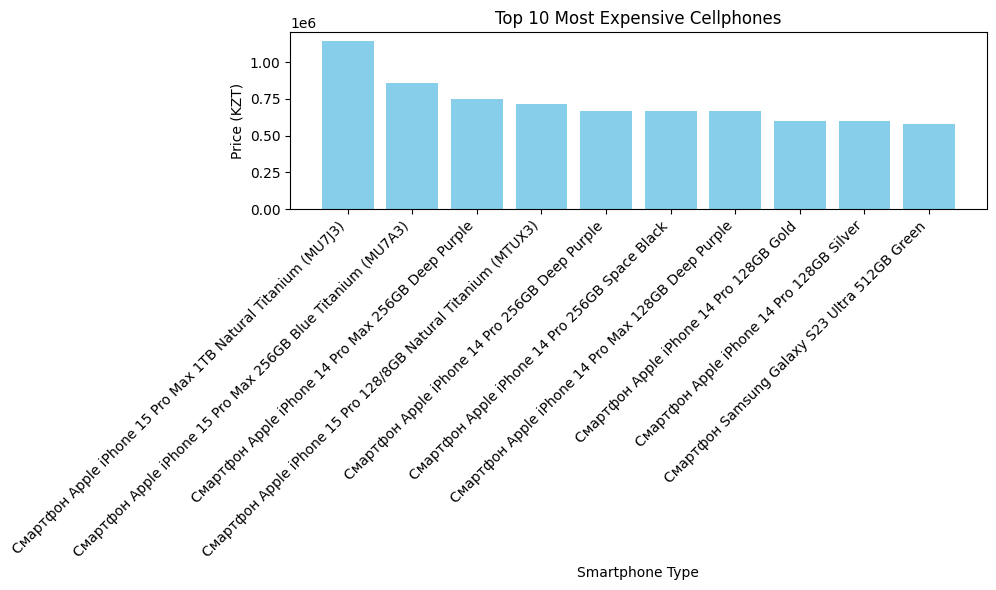

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

df_sorted = df2.sort_values(by='product_price', ascending=False).head(10)
print(df_sorted)
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['product_name'], df_sorted['product_price'], color='skyblue')
plt.xlabel("Smartphone Type")
plt.ylabel("Price (KZT)")
plt.title("Top 10 Most Expensive Cellphones")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

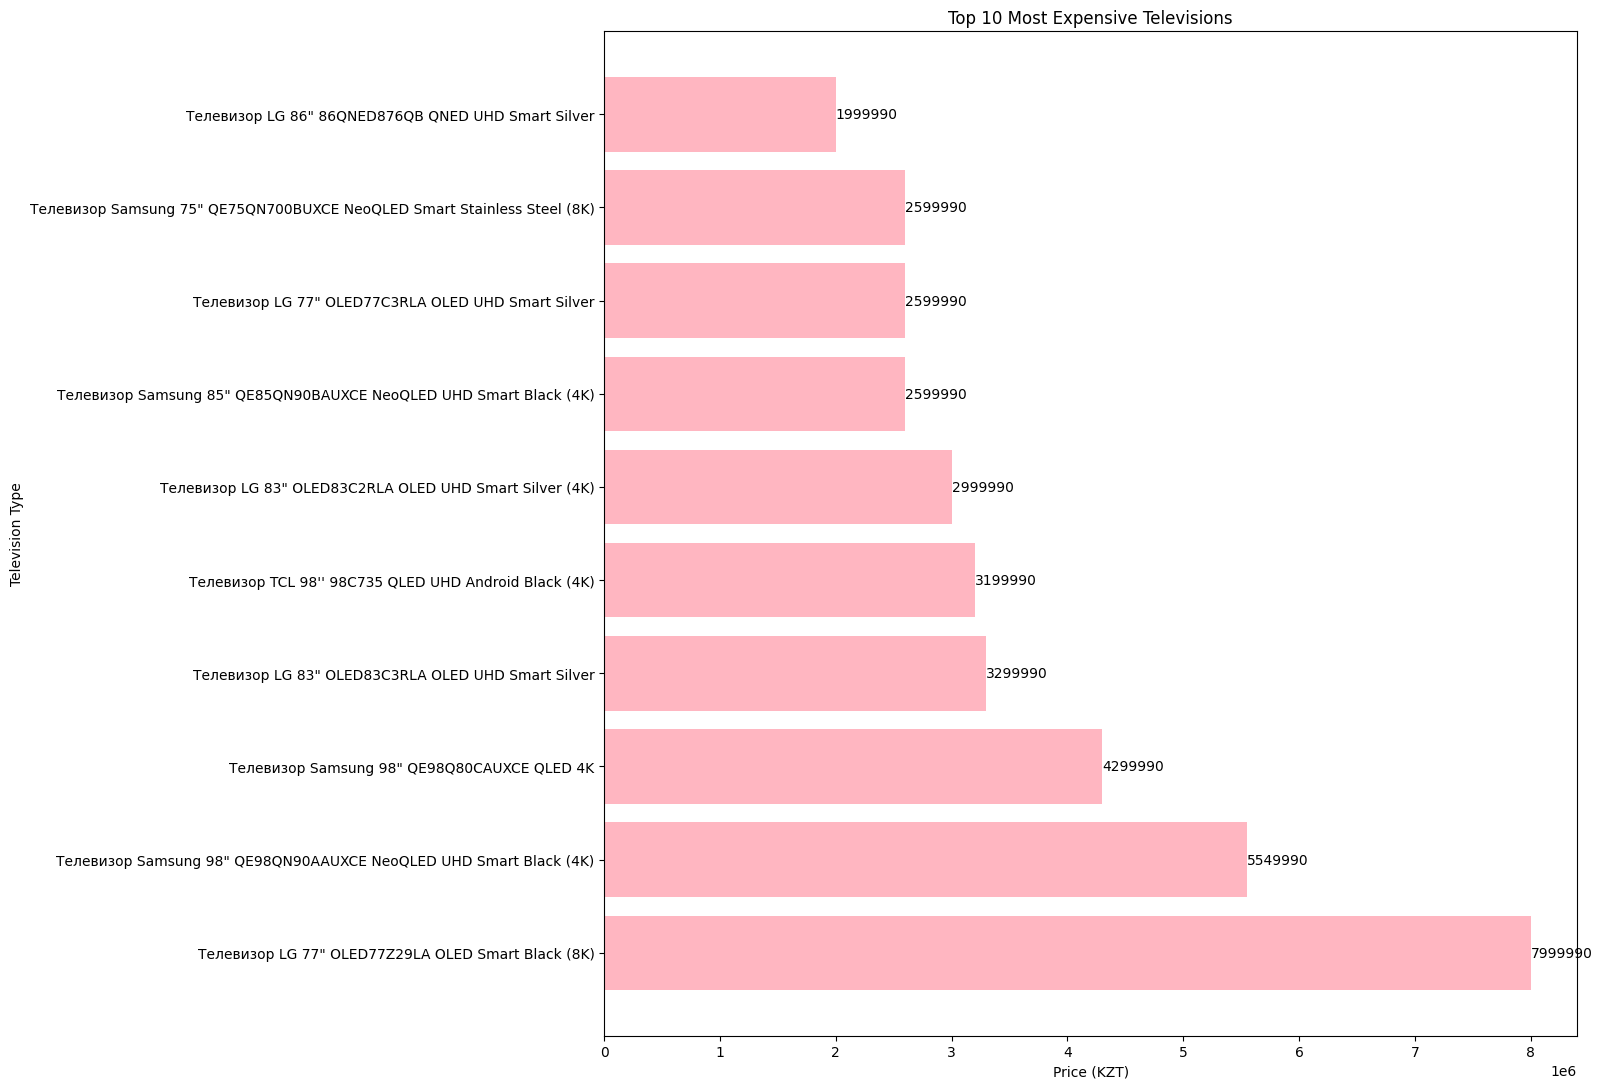

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame with columns 'product_name' and 'product_price'
df_sorted = df4.sort_values(by='product_price', ascending=False).head(10)

plt.figure(figsize=(16, 11))
bars = plt.barh(df_sorted['product_name'], df_sorted['product_price'], color='lightpink')

# Adding data values on the right side of the bars
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval), ha='left', va='center')

plt.xlabel("Price (KZT)")
plt.ylabel("Television Type")
plt.title("Top 10 Most Expensive Televisions")
plt.tight_layout()
plt.show()


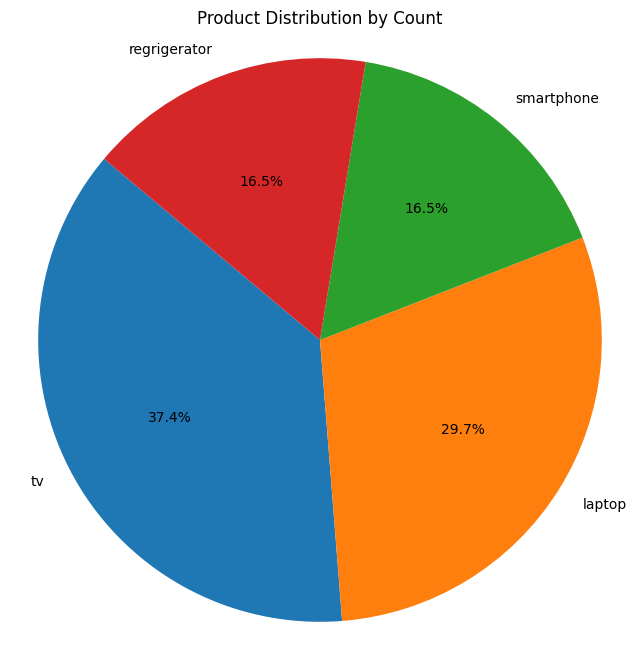

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

product_counts = concatenated_df['product_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(product_counts, labels=product_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Product Distribution by Count')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.show()

[Текст ссылки](`https://`)Bar Chart of Average Product Price by Type:



<Axes: xlabel='product_type'>

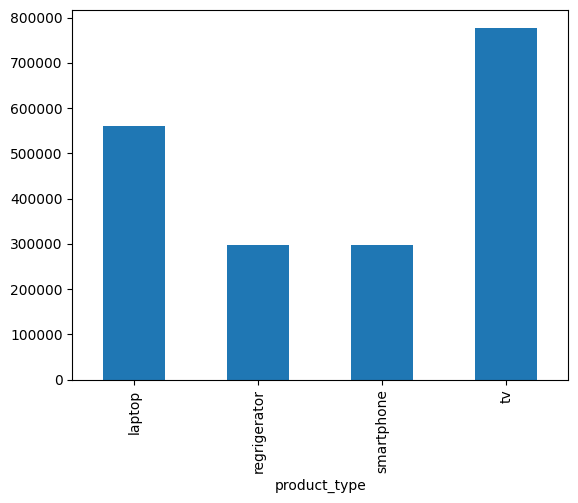

In [42]:
concatenated_df.groupby('product_type')['product_price'].mean().plot(kind='bar')

Histogram of Product Prices:



<Axes: ylabel='Frequency'>

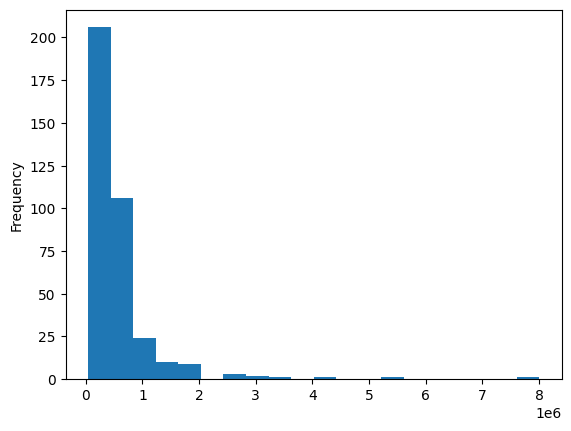

In [43]:
concatenated_df['product_price'].plot(kind='hist', bins=20)


Box Plot of Product Prices by Type:



<Axes: title={'center': 'product_price'}, xlabel='product_type'>

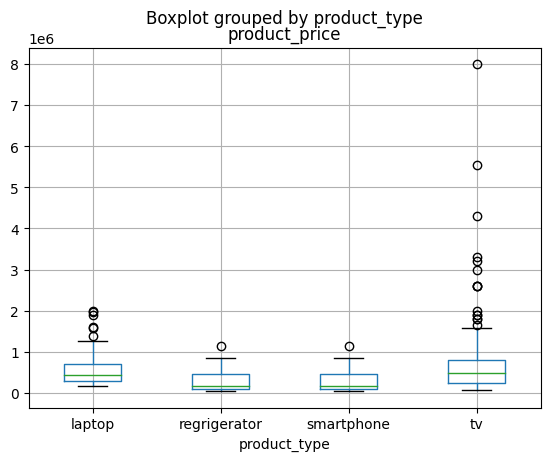

In [44]:
concatenated_df.boxplot(column='product_price', by='product_type')
